### About Dataset

Temperature dataset contains data about the temperature recorded in summer from 2013 to 2017,
the input data LDAPS models record. LDAPS stands for Lightweight Directory Access Protocol to administer Administration over Seoul, South .
the main aim behind this collection was to predict the next day's minimum and maximum temperature.

so in this dataset we are having two target variable one to determine next day's minimum temperature and other one to determine other day's maximum temperature

###### Importing Libraries

In [84]:
import pandas as pd
import numpy as np

##### Loading Dataset

In [85]:
df=pd.read_csv('temperature.csv')

##### Basic Insights of the Dataset

In [86]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


##### Checking the Column names

In [87]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

##### Checking the Dimension of dataset

In [88]:
df.shape

(7752, 25)

##### Checking Datatypes of the column

In [89]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

### Identifying  and Treating Missing values
A missing value condition occurs whenever a data entry is left empty

In [90]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

### About Columns


 station        ->  used weather station number: 1 to 25
         
 Date           ->  Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
    
 Present_Tmax   ->  Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
    
 Present_Tmin   ->  Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
    
 LDAPS_RHmin    ->  LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
    
 LDAPS_RHmax    ->  LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
    
 LDAPS_Tmax_lapse  ->  LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
    
 LDAPS_Tmin_lapse  -> LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
    
 LDAPS_WS         -> LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
     
 LDAPS_LH          ->  LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
    
 LDAPS_CC1        -> LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
    
 LDAPS_CC2       -> LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
    
 LDAPS_CC3       -> LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
    
 LDAPS_CC4       -> LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
    
 LDAPS_PPT1      -> LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
    
 LDAPS_PPT2      -> LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
    
 LDAPS_PPT3      -> LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
    
 LDAPS_PPT4      -> LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
    
 lat             -> Latitude (Â°): 37.456 to 37.645
    
 lon            -> Longitude (Â°): 126.826 to 127.135
    
 DEM             -> Elevation (m): 12.4 to 212.3
    
 Slope            -> Slope (Â°): 0.1 to 5.2
    
 Solar radiation  -> Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
    
 Next_Tmax        -> The next-day maximum air temperature (Â°C): 17.4 to 38.9
    
 Next_Tmin     -> The next-day minimum air temperature (Â°C): 11.3 to 29.8T


### Visualizing Null Values

<AxesSubplot:>

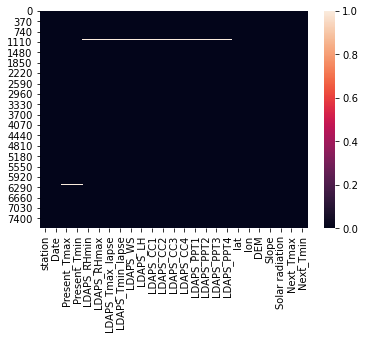

In [91]:
import seaborn as sns
sns.heatmap(df.isnull())

##### Dropping the Null Rows

In [92]:
df.dropna(axis=0,inplace=True)

In [93]:
#rechecking the null values
df.isnull().sum()
    

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [94]:
#echecking the dimension
df.shape

(7588, 25)

### Visualizing the Dataset

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


<AxesSubplot:ylabel='Frequency'>

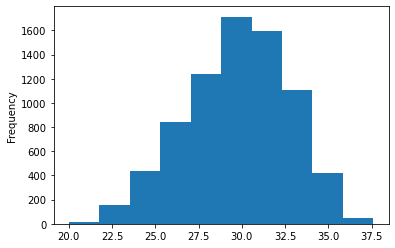

In [96]:
df['Present_Tmax'].plot.hist()

from the above graph it can be figured out that maximum tempreature is recorded between 27.5 to 32.5

<AxesSubplot:ylabel='Frequency'>

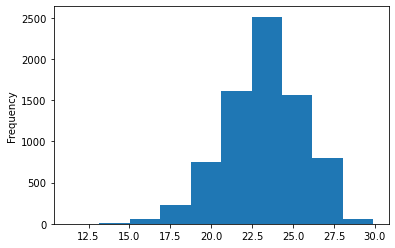

In [97]:
df['Present_Tmin'].plot.hist()

from the above graph it can be figured out that highest minimum temperature is recorded between 22.5 to 25.0

<AxesSubplot:ylabel='Frequency'>

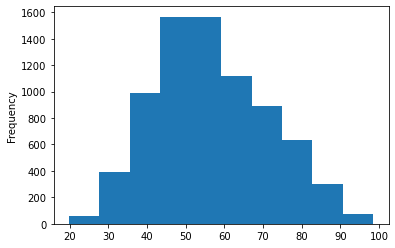

In [98]:
df['LDAPS_RHmin'].plot.hist()

it can be observed that highest LDAPS model forecast of next-day minimum relative humidity is between 40 to 60

<AxesSubplot:ylabel='Frequency'>

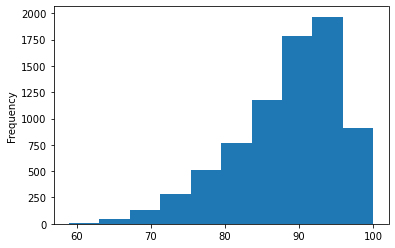

In [99]:
df['LDAPS_RHmax'].plot.hist()

Highest frequency of LDAPS model forecast of next-day maximum relative humidity is between 90 to 100

<AxesSubplot:ylabel='Frequency'>

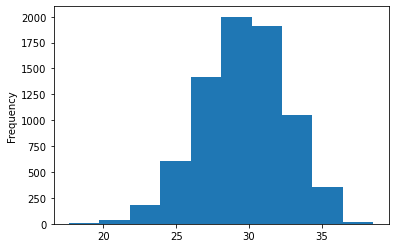

In [100]:
df['LDAPS_Tmax_lapse'].plot.hist()

highest rate of LDAPS model forecast of next-day maximum air temperature applied lapse rate is between 27 to 32 and lowest is from 20 

<AxesSubplot:ylabel='Frequency'>

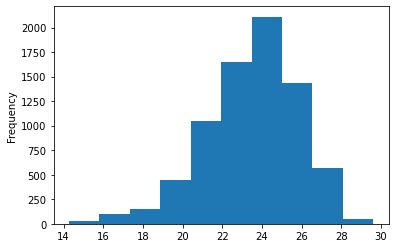

In [101]:
df['LDAPS_Tmin_lapse'].plot.hist()

highest LDAPS model forecast of next-day minimum air temperature applied lapse rate is recorded between 24 to 26

<AxesSubplot:ylabel='Frequency'>

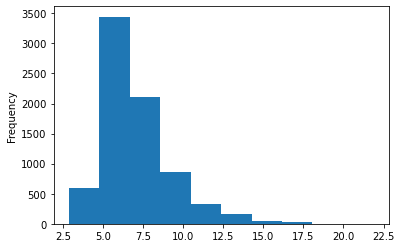

In [102]:
df['LDAPS_WS'].plot.hist()

highest LDAPS model forecast of next-day average wind speed is between 5 to 7.5

<AxesSubplot:ylabel='Frequency'>

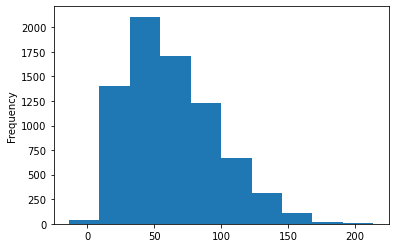

In [103]:
df['LDAPS_LH'].plot.hist()

LDAPS model forecast of next-day average latent heat flux highest frequency is between 25 to 75

<AxesSubplot:ylabel='Frequency'>

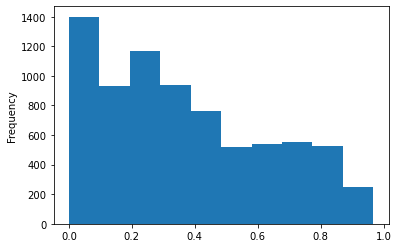

In [104]:
df['LDAPS_CC1'].plot.hist()

highest record of LDAPS model forecast of next-day 1st 6-hour split average cloud cover is between 0 to 0.1

<AxesSubplot:ylabel='Frequency'>

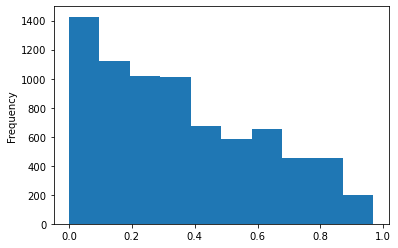

In [105]:
df['LDAPS_CC2'].plot.hist()

highest record of LDAPS model forecast of next-day 2nd 6-hour split average cloud cover is between 0.0 to 0.1

<AxesSubplot:ylabel='Frequency'>

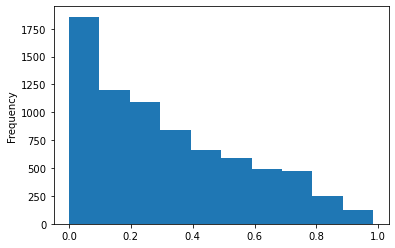

In [106]:
df['LDAPS_CC3'].plot.hist()

highest record of LDAPS model forecast of next-day 3rd 6-hour split average cloud cover is between 0.0 to 0.1

<AxesSubplot:ylabel='Frequency'>

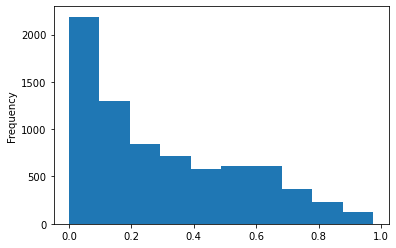

In [107]:
df['LDAPS_CC4'].plot.hist()

 highest record of LDAPS model forecast of next-day 4th 6-hour split average cloud cover is between 0.0 to 0.1

<AxesSubplot:ylabel='Frequency'>

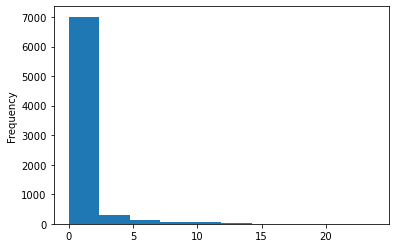

In [108]:
df['LDAPS_PPT1'].plot.hist()

highest LDAPS model forecast of next-day 1st 6-hour split average precipitation is between 0 to 2.5

<AxesSubplot:ylabel='Frequency'>

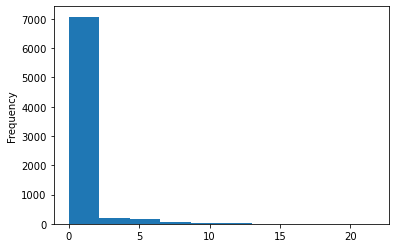

In [109]:
df['LDAPS_PPT2'].plot.hist()

highest record of LDAPS model forecast of next-day 2nd 6-hour split average precipitation is between 0 to 2.5

<AxesSubplot:ylabel='Frequency'>

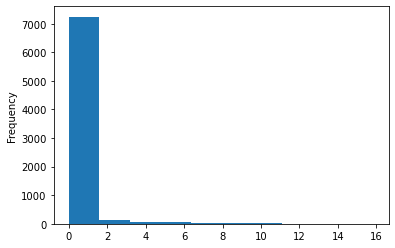

In [110]:
df['LDAPS_PPT3'].plot.hist()

highest record of LDAPS model forecast of next-day 3rd 6-hour split average precipitation is between 0 to 1/1.75

<AxesSubplot:ylabel='Frequency'>

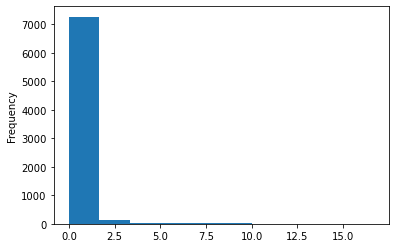

In [111]:
df['LDAPS_PPT4'].plot.hist()

highest record of LDAPS model forecast of next-day 4th 6-hour split average precipitation is between 0 to 2 /2.5

<AxesSubplot:ylabel='Frequency'>

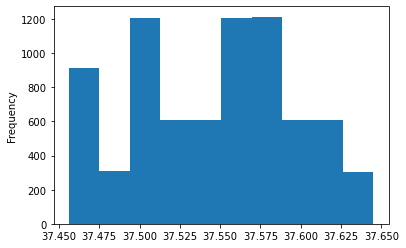

In [112]:
df['lat'].plot.hist()

highest latitude recorded is between 37.550 to 37.575

<AxesSubplot:ylabel='Frequency'>

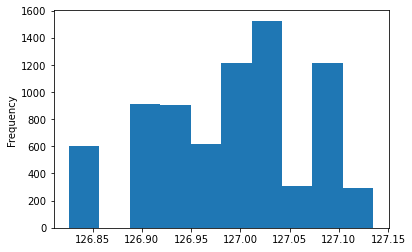

In [113]:
df['lon'].plot.hist()

Highest longitude is recorded between 127.00 to 127.05

<AxesSubplot:ylabel='Frequency'>

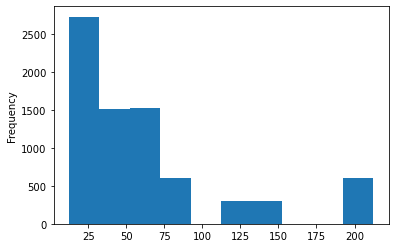

In [114]:
df['DEM'].plot.hist()

Highest elevation recorded is between 0 to 25

<AxesSubplot:ylabel='Frequency'>

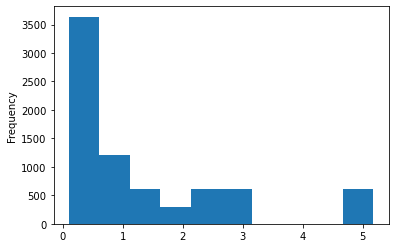

In [115]:
df['Slope'].plot.hist()

Highest slope is recorded between 0 to 0.50

<AxesSubplot:ylabel='Frequency'>

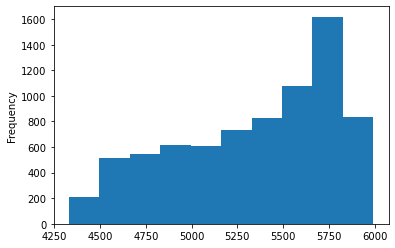

In [116]:
df['Solar radiation'].plot.hist()

highest Daily incoming solar radiationis between 5500 to 5750

<AxesSubplot:ylabel='Frequency'>

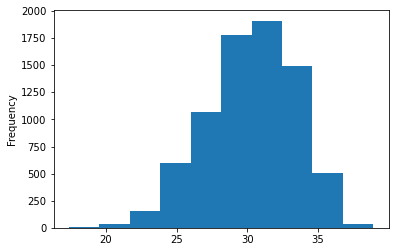

In [117]:
df['Next_Tmax'].plot.hist()

the The next-day maximum air temperature is recorded between 30 to 32.5

<AxesSubplot:ylabel='Frequency'>

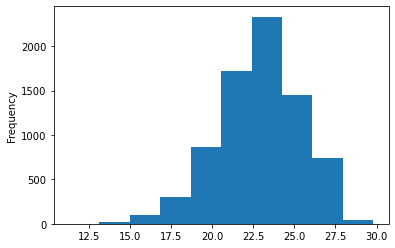

In [118]:
df['Next_Tmin'].plot.hist()

the next day minimum temperature is recoded highly between 22.5 to 25

# Bivariate Analysis between all columns and 'Next_Tmax'

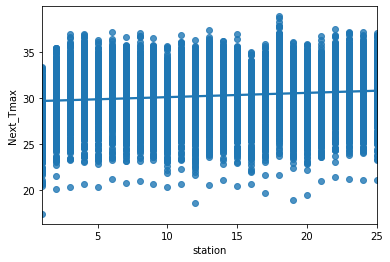

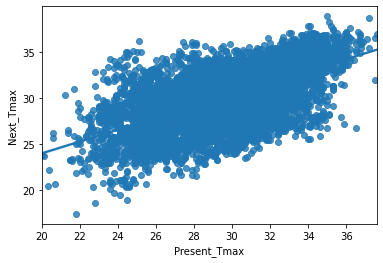

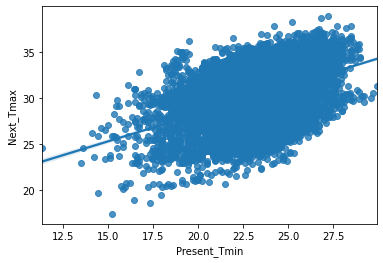

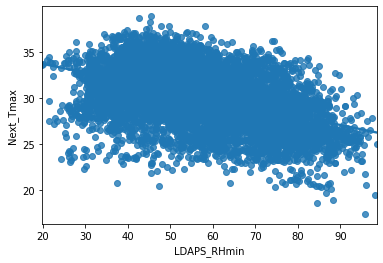

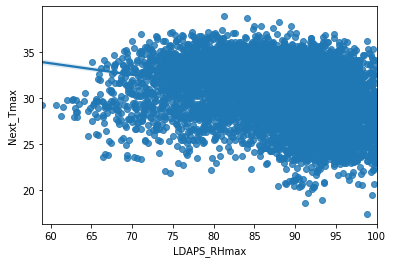

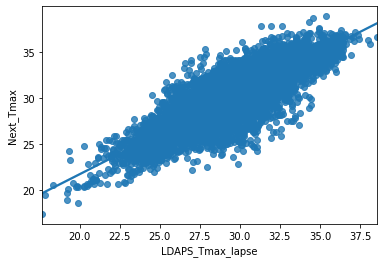

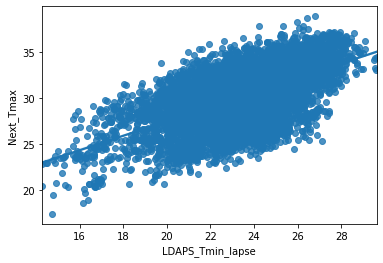

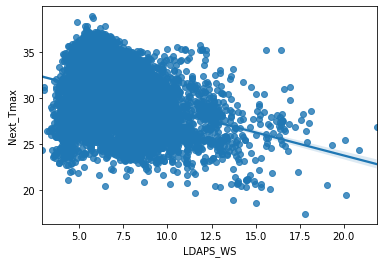

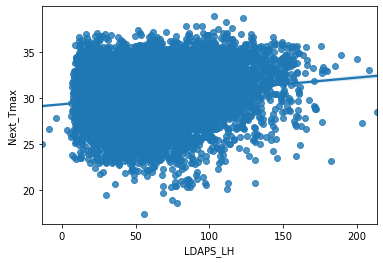

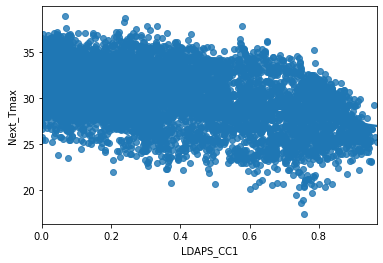

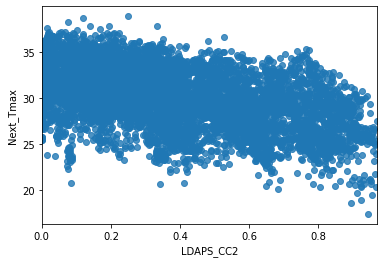

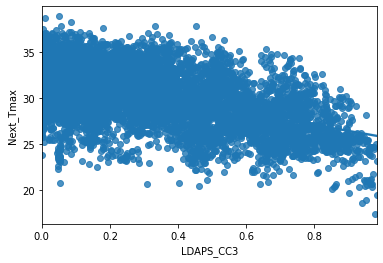

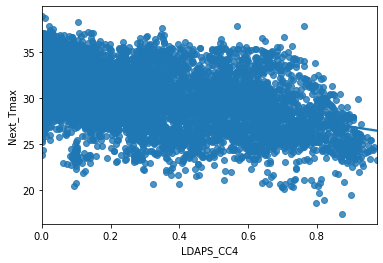

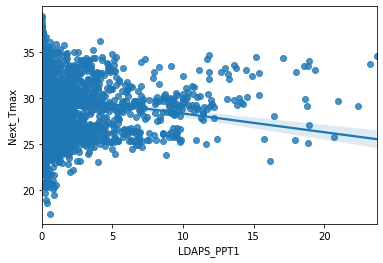

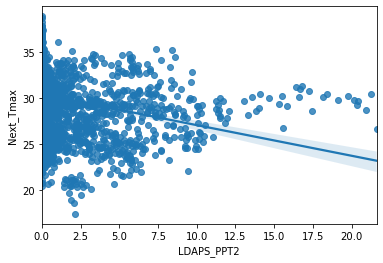

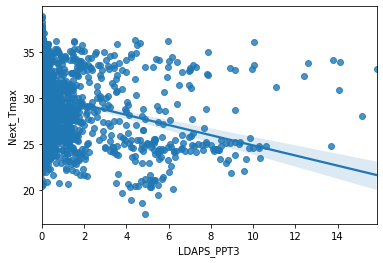

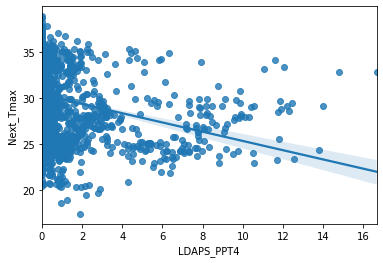

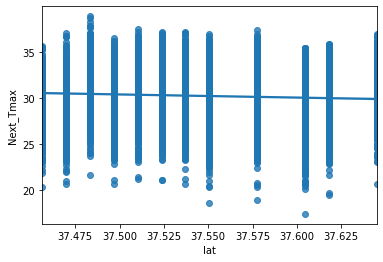

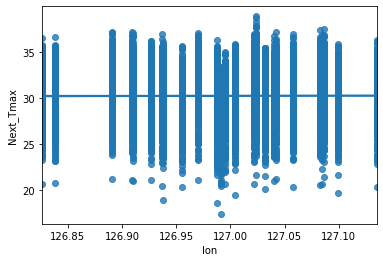

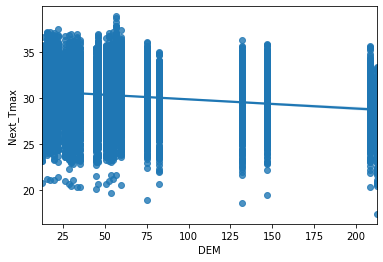

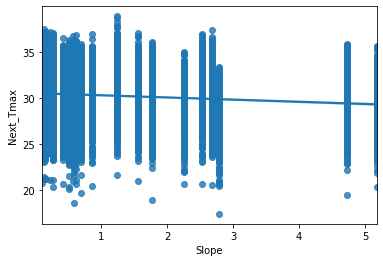

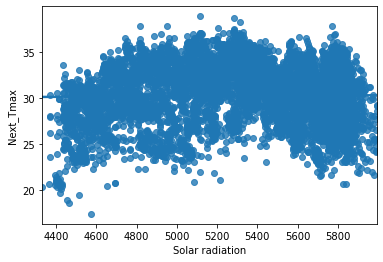

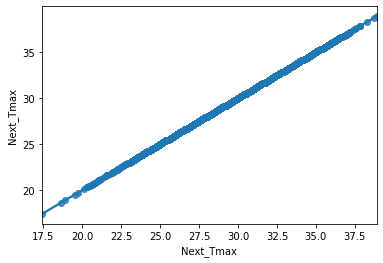

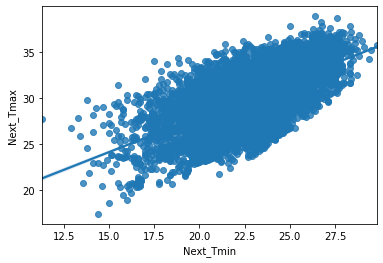

In [119]:
for i in df.columns:
    if df[i].dtypes == 'float64':
        plt.figure()
        sns.regplot(x=df[i],y='Next_Tmax',data=df)

        

Observation:-

1) station is having weak relation with 'Next_Tmax'

2) Present_Tmax is positively correlated with Next_Tmax

3) Present_Tmin is positively correlated with Next_Tmax

4) LDAPS_Rhmin, LDAPS_RHmax is having weak relation with 'Next_Tmax'

5) LDAPS_Tmax_Lapse, LDAPS_Tmin_Lapse is having postively strong relation with 'Next_Tmax'

6) LDAPS_WS, LDAPS_CC3, LDAPS_CC4 ,  is having negtive relation with 'Next_Tmax'

7) LDAPS_LH, LDAPS_CC1 , LDAPS_CC2, LDAPS_CC3 , LDAPS_CC4  is having weak relation with 'Next_Tmax'

8) LDAPS_PPT1, LDAPPS_PPT2 , LDAPS_PPT3 , LDAPS_PPT4 is having strong negative relation with 'Next_Tmax'

9) LAT, LON , DEM, SLOPE, SOLAR-RADIATION is having week relation with 'Next_Tmax'

10) Next_Tmin is having positive relation with'Next_Tmax



# Bivariate Analysis between all columns and 'Next_Tmin'

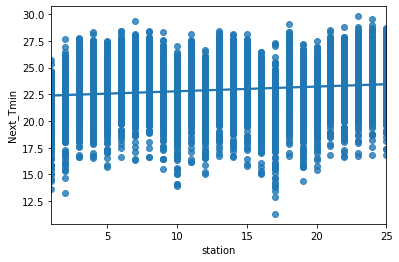

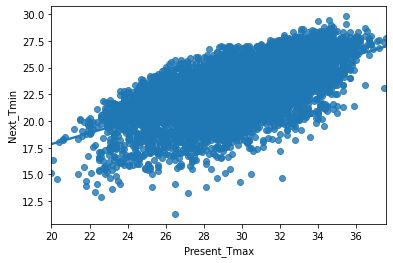

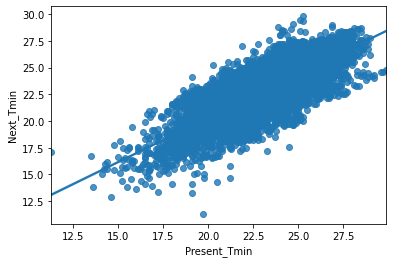

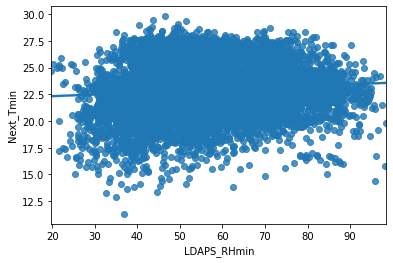

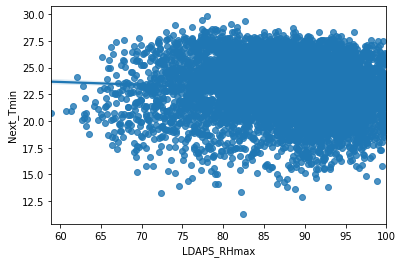

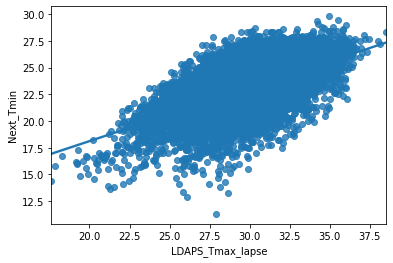

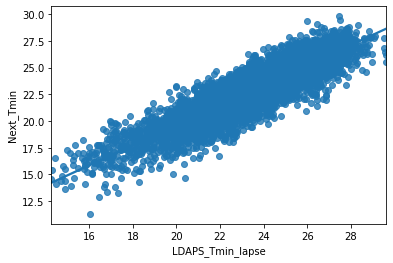

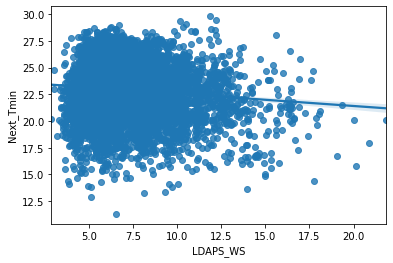

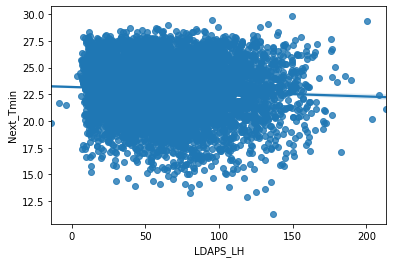

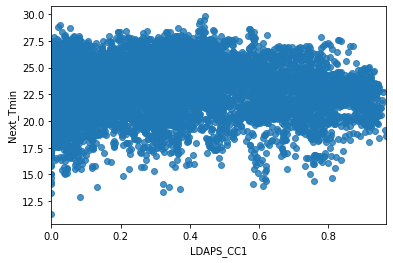

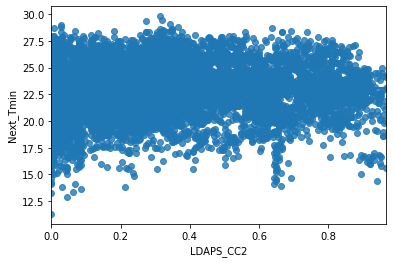

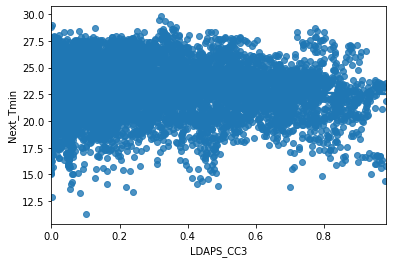

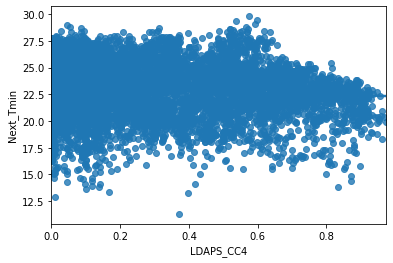

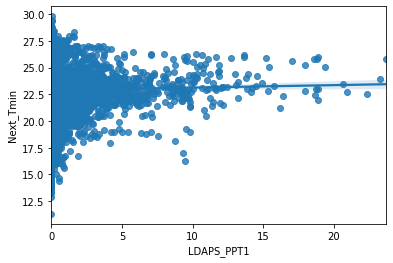

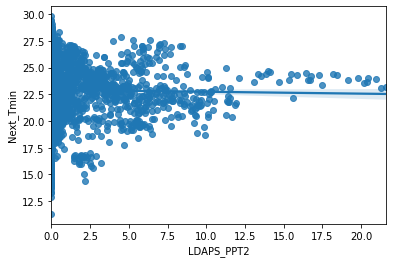

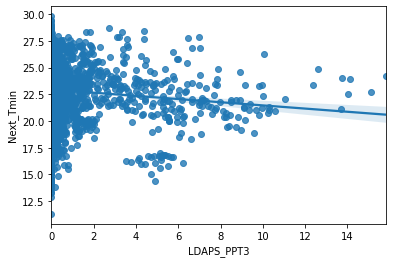

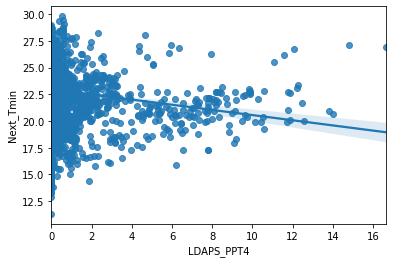

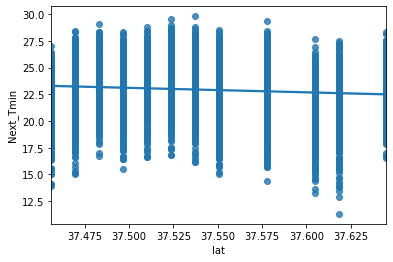

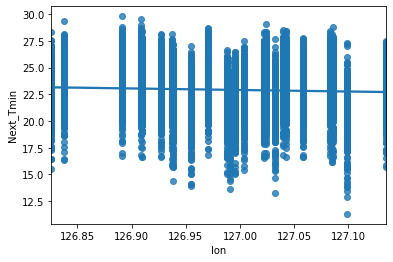

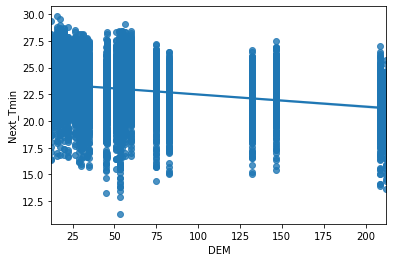

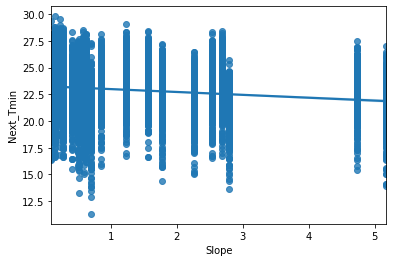

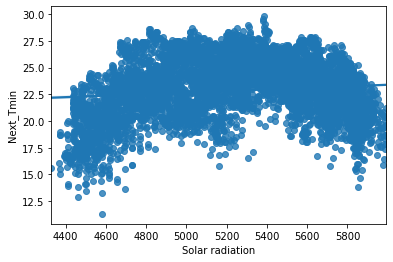

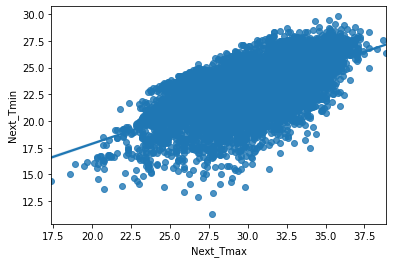

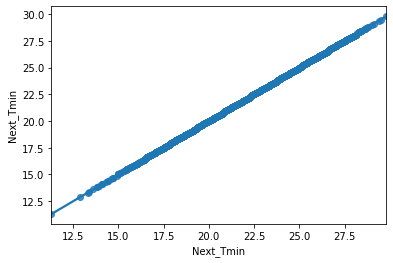

In [120]:
for i in df.columns:
    if df[i].dtypes == 'float64':
        plt.figure()
        sns.regplot(x=df[i],y='Next_Tmin',data=df)

Observation:-

1) station is having weak relation with 'Next_Tmin'

2) Present_Tmax is positively correlated with Next_Tmin

3) Present_Tmin is positively correlated with Next_Tmin

4) LDAPS_Rhmin, LDAPS_RHmax is having weak relation with 'Next_Tmin'

5) LDAPS_Tmax_Lapse, LDAPS_Tmin_Lapse is having postively strong relation with 'Next_Tmin'

6) LDAPS_WS, LDAPS_CC3, LDAPS_CC4 ,  is having negtive relation with 'Next_Tmin'

7) LDAPS_LH, LDAPS_CC1 , LDAPS_CC2, LDAPS_CC3 , LDAPS_CC4  is having low weak relation with 'Next_Tmin'

8) LDAPS_PPT1, LDAPPS_PPT2 , LDAPS_PPT3 , LDAPS_PPT4 is having strong negative relation with 'Next_Tmin'

9) LAT, LON , DEM, SLOPE, SOLAR-RADIATION is having week relation with 'Next_Tmin'

10) Next_Tmax is having positive relation with'Next_Tmin

## Descriptive Statistics

describe() method in python describes the basic features of the data,

It gives short summaries aboout the dataset and measures of the dataset like No of items , mean , Standard_Deviation , minimum value of 
dataset, 25th, 50th(median) and 75% percentile of each  column and Gives the maximum value of the dataset too

In [121]:
pd.set_option('display.max_rows',None)
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


Observation :

1)LDAPS_WS ,LDAPS_LH , LDAPS_PPT3, LDAPS_PPT4 , DEM ,SLOPE have a significant difference between their 75% and Max it means this columns 
contains Outliers

2) station ,present_Tmax, Present_Tmin ,LDAPS_RHmax , LDAPS_Tmax_lapse , LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_CC1 ,LAT,LON, NEXT_Tmax, Next_Tmin
have the small standard deviation it means the data of all this columns are not widely spread, 

3)  LDAPS_RHmin , DEM , Solar Radiation have high range of standard deviation it means data is widely spread



## Checking Correlation

Correlation is a statistical metric for measuring to what extent  different variables are Interdependent .

In another word, if one variable changes how it affects the change in another variable

In [122]:
dfcor=df.corr()

<AxesSubplot:>

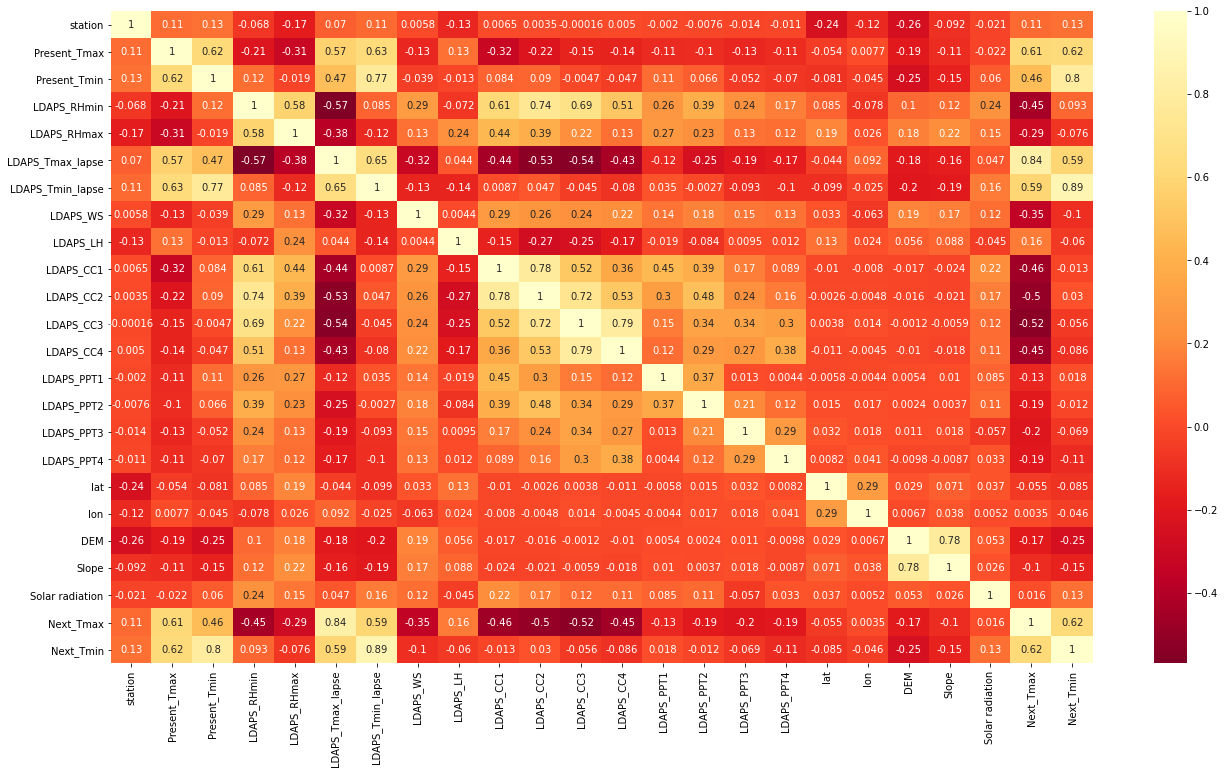

In [123]:
plt.figure(figsize=(22,12))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

Observation :
    

1) LDAPS_Tmax_Lapse is highly correlated with Next_Tmax ,

2) and LDAPS_Tmin_Lapse is highly correlated with Next_Tmin,

3)Next_Tmax is negatively correlated LDAPS_RHmin , LDAPS_CC1, LDAPS_CC2, LDAPS_CC3,, LDAPS_CC4.

4)Present_Tmax, Present_Tmin is highlu correlated with Next_Tmax and Next_Tmin respectively.

5) LDAPS_WS, DEM, SLOPE are having weak relation with Next_Tmax and Next_Tmin.

6)LDAPS_tmax_lapse are negatively cprrelated with  LDAPS_CC1, LDAPS_CC2, LDAPS_CC3,, LDAPS_CC4.

7)DEM and Slope ,  LDAPS_CC1 and  LDAPS_CC2, LDAPS_CC3 and  LDAPS_CC4 are positively correlated with each other

##  Feature Engineering

As the date column is object and it will be unappropriate to label encode date column, so it will be better to split the date column into day, month and year and to drop the date columns for better learning of the model 

In [124]:
#separating the month from Date column as month
df['month'] =pd.DatetimeIndex(df['Date']).month

In [125]:
#separating the year from Date column as month
df['year'] =pd.DatetimeIndex(df['Date']).year

In [126]:
#separating the day from Date column as month
df['day'] =pd.DatetimeIndex(df['Date']).day

#### Dropping Column

In [127]:
# dropping date column as its data is splitted and saved individually
df.drop('Date',inplace=True,axis=1)

In [128]:
# checking dataset after Adding day, month and year column and by removing Date Column
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,month,year,day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,6,2013,30
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,6,2013,30
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,6,2013,30
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,6,2013,30
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,6,2013,30


### Checking Outliers 

Outliers are the values that fall really outside the range of the data, and it is checked through two methods zscore and IQR

In [129]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [130]:
threshold=3,
print(np.where(z>3))

(array([  25,   25,   26, ..., 7581, 7582, 7582], dtype=int64), array([ 7, 14, 14, ...,  2,  2,  6], dtype=int64))


In [131]:
df_new=df[(z<3).all(axis=1)]

In [132]:
df_new.shape , df.shape

((6739, 27), (7588, 27))

In [133]:
df_new.shape , df.shape

((6739, 27), (7588, 27))

In [134]:
data_loss =((7588-6739)/7588)*100

In [135]:
data_loss

11.188719030047443

###### As we can see the outliers are trying to remove more than 11 % data to remove , and such a data loss is not at all affordable , so we cannot cure Outliers through zscore .lets ry to check outlier throgh IQR method

In [136]:
#checking outliers using IQR
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1
print(IQR)

station              12.000000
Present_Tmax          4.200000
Present_Tmin          3.200000
LDAPS_RHmin          21.154856
LDAPS_RHmax           9.539001
LDAPS_Tmax_lapse      4.037353
LDAPS_Tmin_lapse      3.068840
LDAPS_WS              2.353603
LDAPS_LH             47.029465
LDAPS_CC1             0.427627
LDAPS_CC2             0.416839
LDAPS_CC3             0.395495
LDAPS_CC4             0.416632
LDAPS_PPT1            0.052594
LDAPS_PPT2            0.017735
LDAPS_PPT3            0.007855
LDAPS_PPT4            0.000017
lat                   0.067400
lon                   0.105000
DEM                  31.132400
Slope                 1.496500
Solar radiation     728.000123
Next_Tmax             4.400000
Next_Tmin             3.300000
month                 1.000000
year                  2.000000
day                  16.000000
dtype: float64


In [137]:
df_iqr_new=(df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR)) 

In [138]:
df_iqr_neww=df_iqr_new[~((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR))).any(axis=1)]

In [139]:
df_iqr_neww.shape , df.shape

((2371, 27), (7588, 27))

In [140]:
data_loss = ((7588-2371)/7588)* 100

In [141]:
data_loss

68.7532946758039

it can be clearly observed that through IQR data loss is of 68 % which is highly not affordable to do, so dropping thr idea of remvoving Outlier

### Checking Skewness

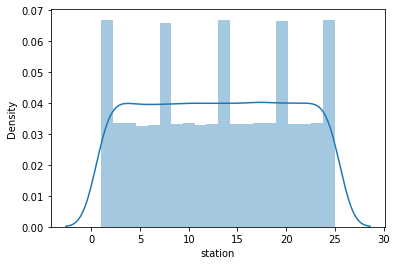

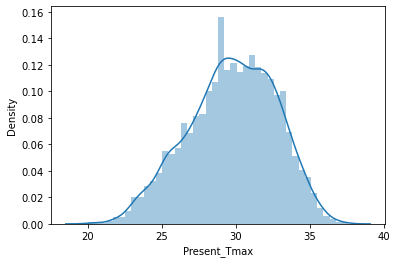

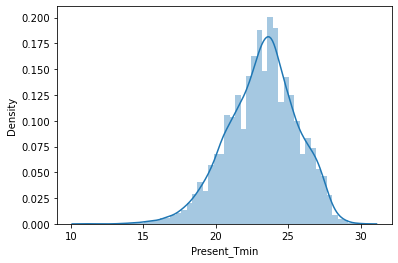

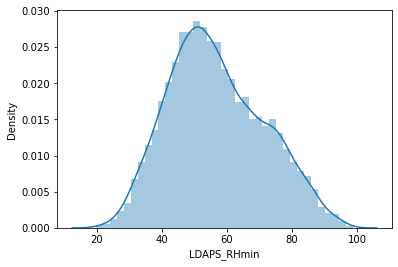

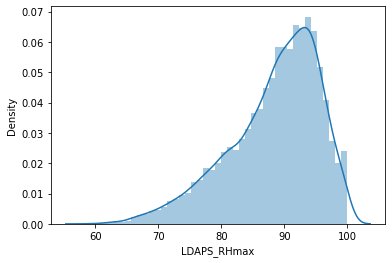

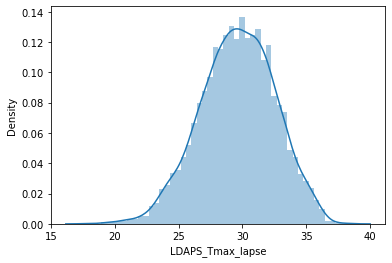

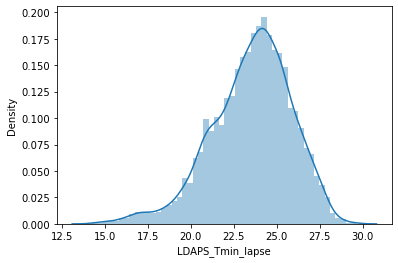

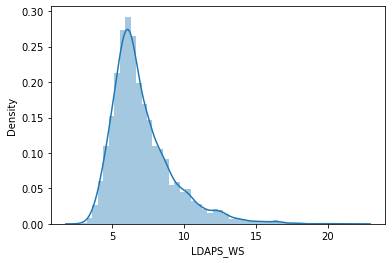

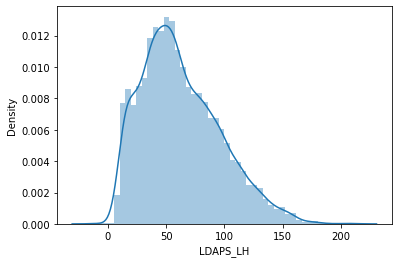

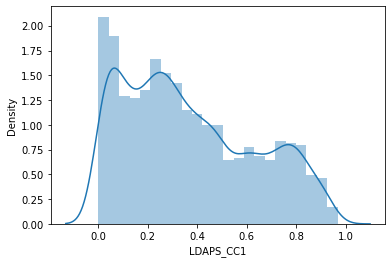

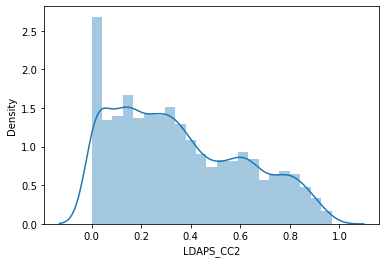

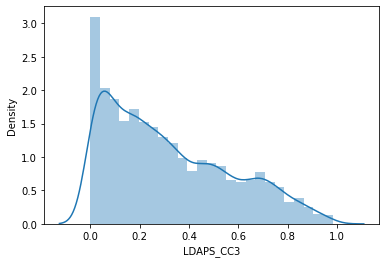

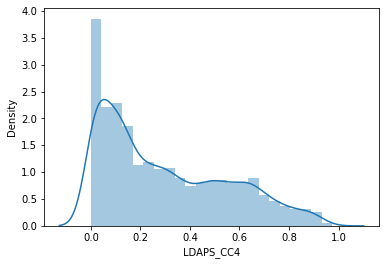

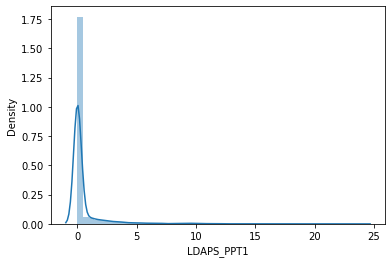

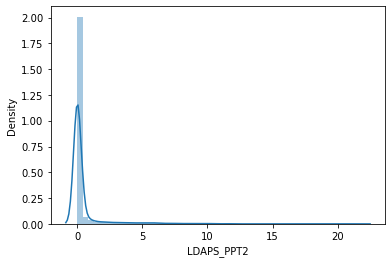

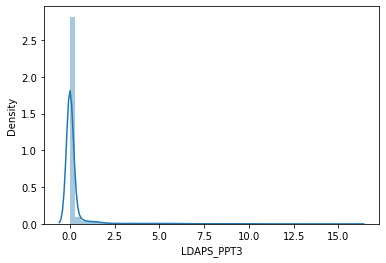

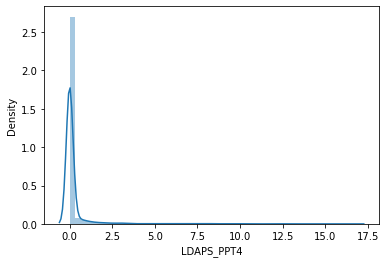

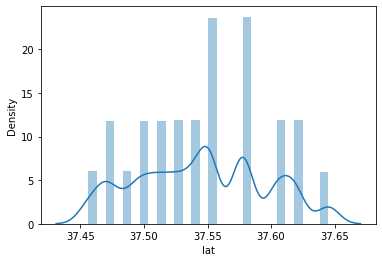

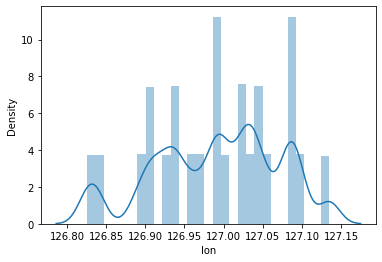

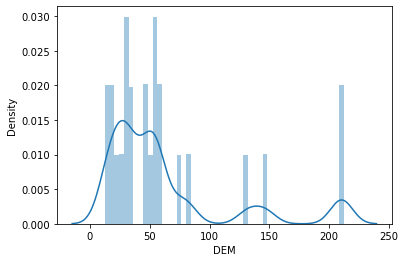

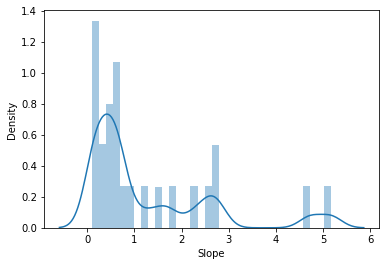

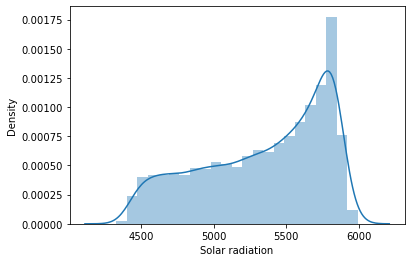

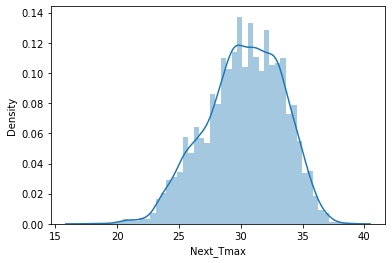

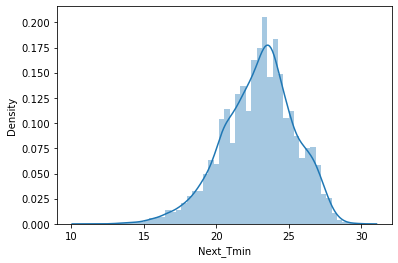

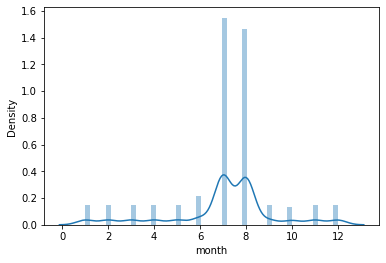

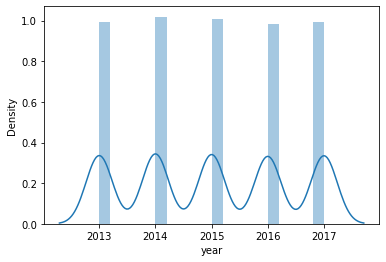

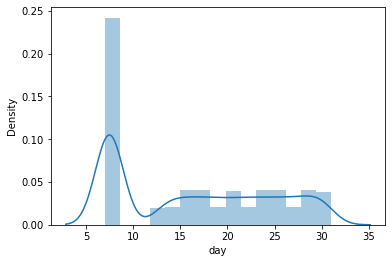

In [142]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])

visually it can be clearly observed that skewness is present in the dataset

LDAPS_WS , LDAPS_LH , LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4, slope sre highly rightly skewed,

LDAPS_PPT1 ,LDAPS_PPT2 ,LDAPS_PPT3 ,LDAPS_PPT4 ,  have high skewness,

LDAPS_RHmax , solar radiation are left skewed

In [143]:
#statiscally checking skewness
df.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
month              -0.703092
year                0.013575
day                 0.245563
dtype: float64

it can be seen that many score have skew score greater than 0.5 ,indicating presence of skewness, and many columns are also 
having negative skew score and also above 0.5

### Separating the data into Features and Target ( will predict both targets separately and will split accordingly)

In [144]:
features=df[['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'month', 'year', 'day']]

In [145]:
features.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,month,year,day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,6,2013,30
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,6,2013,30
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,6,2013,30
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,6,2013,30
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,6,2013,30


In [146]:
target1=df['Next_Tmax']

In [147]:
target1

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
5       31.5
6       30.9
7       31.1
8       31.3
9       30.5
10      31.2
11      32.6
12      31.4
13      31.7
14      30.8
15      30.8
16      31.5
17      33.1
18      31.8
19      30.8
20      30.6
21      32.6
22      31.8
23      31.3
24      32.0
25      24.8
26      27.3
27      28.1
28      27.9
29      28.2
30      28.9
31      27.6
32      28.2
33      27.1
34      27.5
35      28.9
36      26.8
37      28.7
38      27.9
39      27.1
40      27.5
41      27.8
42      29.2
43      27.1
44      27.3
45      28.2
46      29.1
47      28.1
48      28.2
49      28.8
50      28.1
51      30.8
52      31.2
53      31.3
54      31.3
55      31.3
56      30.0
57      30.0
58      30.1
59      29.4
60      31.6
61      31.5
62      31.6
63      30.2
64      30.4
65      30.1
66      31.4
67      32.6
68      30.5
69      30.6
70      30.5
71      32.5
72      31.2
73      30.5
74      31.0
75      25.2
76      28.4

In [148]:
target2=df['Next_Tmin']

In [149]:
target2

0       21.2
1       22.5
2       23.9
3       24.3
4       22.5
5       24.0
6       23.4
7       22.9
8       21.6
9       21.0
10      24.5
11      22.2
12      24.3
13      22.9
14      22.8
15      20.9
16      21.1
17      23.9
18      21.6
19      23.0
20      24.0
21      23.7
22      23.2
23      23.7
24      24.2
25      18.7
26      21.5
27      21.8
28      21.5
29      22.2
30      22.3
31      21.2
32      21.3
33      21.0
34      20.7
35      22.5
36      19.8
37      22.3
38      21.5
39      20.7
40      20.8
41      21.7
42      22.1
43      20.5
44      20.7
45      21.7
46      22.3
47      21.8
48      21.9
49      21.9
50      17.8
51      19.8
52      20.7
53      20.7
54      20.8
55      20.9
56      20.1
57      20.3
58      19.4
59      19.1
60      21.2
61      18.9
62      21.0
63      20.0
64      19.7
65      18.9
66      20.5
67      20.8
68      19.5
69      20.1
70      20.7
71      20.9
72      20.5
73      20.6
74      20.7
75      20.8
76      22.9

finding the best random state

In [150]:
from sklearn.preprocessing import power_transform
x=power_transform(features)
x=pd.DataFrame(x,columns=features.columns)

In [151]:
features=x

# Training model for Next_Tmax

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [229]:
maxr2score=0
best_random_state=0
for i in range(0,1000):
    features_train,features_test,target1_train,target1_test=train_test_split(features,target1,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(features_train,target1_train)
    pred_train=lr.predict(features_train)        #x_train
    pred_test1=lr.predict(features_test)        #x_test
    r2score=r2_score(target1_test,pred_test1)
    if r2score > maxr2score:
        maxr2score = r2score
        best_random_state =i
        print(f"r2score is {maxr2score} at random state of {best_random_state}")


r2score is 0.7827759646475121 at random state of 0
r2score is 0.7836175888580049 at random state of 5
r2score is 0.7947335399550658 at random state of 30
r2score is 0.7962730272659385 at random state of 43
r2score is 0.7963682716502045 at random state of 453
r2score is 0.7965030438084406 at random state of 777


#### the best random score is 777 as it gives the  best r2_score of 79.65%

###### Training Linear Regression Model

In [230]:
features_train,features_test,target1_train,target1_test=train_test_split(features,target1,test_size=.30,random_state=777)
lr=LinearRegression()
lr.fit(features_train,target1_train)
pred_train=lr.predict(features_train)    
pred_test1=lr.predict(features_test)        
print("r2score = ",r2_score(target1_test,pred_test1))

r2score =  0.7965030438084406


### Cross_Validation of the model

In [231]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lr,features,target1,cv=i)
    cv_mean=cv_score.mean()
    print(f" At  cross fole {i}  the cv_core is {cv_mean} ")


 At  cross fole 2  the cv_core is 0.5984262287851558 
 At  cross fole 3  the cv_core is 0.6611695978281383 
 At  cross fole 4  the cv_core is 0.6711855864084919 
 At  cross fole 5  the cv_core is 0.6665474618112223 
 At  cross fole 6  the cv_core is 0.6729166982927732 
 At  cross fole 7  the cv_core is 0.6770833737781956 
 At  cross fole 8  the cv_core is 0.68370337778754 
 At  cross fole 9  the cv_core is 0.6320442732090856 


###### at the cross fold of 8 the model is learning 68.3 %

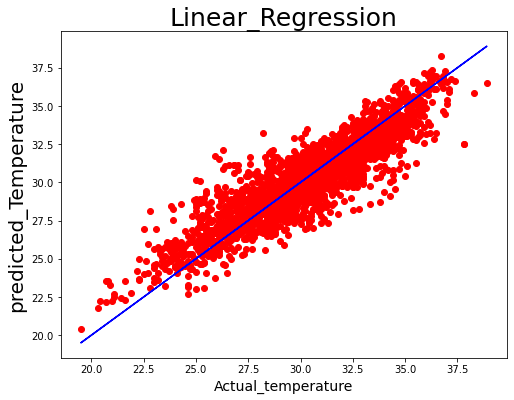

In [156]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target1_test,y=pred_test1,color='r')
plt.plot(target1_test,target1_test,color='b')
plt.xlabel("Actual_temperature",fontsize=14)
plt.ylabel("predicted_Temperature",fontsize=20)
plt.title("Linear_Regression",fontsize=25)
plt.show()

Best Fit Line covering most of the datapoint which shows good fit of our model 

### Regularization

In [232]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings 
warnings.filterwarnings('ignore')

In [233]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10], 'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters,cv=5)
clf.fit(features_train,target1_train)

print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [234]:
ls=Lasso(alpha=0.001,random_state=0)
ls.fit(features_train,target1_train)
ls.score(features_train,target1_train)

pred_ls = ls.predict(features_test)

lss=r2_score(target1_test,pred_ls)
lss

0.7964409085659716

###### The lasso model is giving r2score of 79%

In [235]:
cv_score=cross_val_score(ls,features,target1,cv=7)
cv_mean=cv_score.mean()
cv_mean

0.6775471929205017

###### the cross_val_scoer of lasso is 67%

In [236]:
from sklearn.linear_model import Ridge
parameters={'alpha':[.0001,.001,.01,.1,1,10], 'random_state':list(range(0,10))}
rd=Ridge()
clf=GridSearchCV(rd,parameters,cv=5)
clf.fit(features_train,target1_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [237]:
rd=Ridge(alpha=10,random_state=0)
rd.fit(features_train,target1_train)
rd.score(features_train,target1_train)

pred_rd = rd.predict(features_test)

rdg=r2_score(target1_test,pred_rd)
rdg

0.7964451367345886

###### Ridge model is giving r2_score of 79%

In [238]:
cv_score=cross_val_score(rd,features,target1,cv=7)
cv_mean=cv_score.mean()
cv_mean

0.6772347936550654

###### the cross_val_score of Ridge model is 67 %

## Ensemble Technique¶

In [239]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt",'log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(features_train,target1_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [240]:
rf=RandomForestRegressor(criterion='mse' ,max_features='sqrt')
rf.fit(features_train,target1_train)
rf.score(features_train,target1_train)
pred_rf=rf.predict(features_test)

rfs= r2_score(target1_test,pred_rf)
print("R2_score",rfs*100)


R2_score 92.42298885224717


###### RandomForestRegressor is giving the r2_score of 92%

In [241]:
cv_score=cross_val_score(rf,features,target1,cv=7)
cv_mean=cv_score.mean()
cv_mean

0.6758392760607481

###### cross_val_score of RandomForestRegressor is  68%


    
1)  Linear Regression  is having r2_score  79   and cross_val_score  of   68  so the Difference is    11

2)  Lasso  is having r2_score 79  and cross_val_score  of     67  so the Difference is    12

3)  Ridge  is having r2_score 79  and cross_val_score  of     67  so the Difference is    12
 
3)  RandomForestRegressor is having r2_score 92  and cross_val_score  of  68  so the Difference is  24

Linear Regression , Lasso, Ridge are giving r2_score of 79 and and cross_val_score of 68,67,67 respectively , and
RandomForestRegressorn is giving the highest accuracy o 92, it is possible that the model may overfit, but we can see that the less difference
is found in the Linear Regression of 11

### Hyper parameter Tuning of Linear Regression

In [242]:
# hyper parameter Tuning of LinearRegression model

parameters={
    'fit_intercept':[True,False],
    'normalize':[True,False],
    'copy_X':[True,False]}
lr=LinearRegression()
lrgsv=GridSearchCV(lr,parameters)
lrgsv.fit(features_train,target1_train)

print(lrgsv.best_params_)

{'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [243]:
lr=LinearRegression( copy_X = True, fit_intercept = True, normalize = True)
lr.fit(features_train,target1_train)
lr.score(features_train,target1_train)
pred_lr=lr.predict(features_test)

lrs= r2_score(target1_test,pred_lr)
print("R2_score",lrs*100)


R2_score 79.65030438084405


### Saving the Model

In [244]:

import pickle
filename='Temperature_next_Tmax_prediction_LR_.pkl'
pickle.dump(lr,open(filename,'wb'))

In [245]:
#cross-checking that how well our model has learnt

In [246]:
loaded_model=pickle.load(open('Temperature_next_Tmax_prediction_LR_.pkl','rb'))
result=loaded_model.score(features_test,target1_test)

print(result)

0.7965030438084405


In [247]:
conclusion=pd.DataFrame([loaded_model.predict(features_test)[:],pred_lr[:]],index=["Predicted","Original"])

In [248]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2267,2268,2269,2270,2271,2272,2273,2274,2275,2276
Predicted,32.941829,27.008014,27.646705,31.242898,27.391189,32.516227,29.361642,26.810072,28.316446,29.116276,...,26.976561,35.908483,28.929908,27.923238,33.584396,32.408818,27.954942,25.647018,32.918766,28.60887
Original,32.941829,27.008014,27.646705,31.242898,27.391189,32.516227,29.361642,26.810072,28.316446,29.116276,...,26.976561,35.908483,28.929908,27.923238,33.584396,32.408818,27.954942,25.647018,32.918766,28.60887


###### You can observe the predicted and original values and can conclude that our model has learnt well

# Training model for Next_Tmin

In [249]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [250]:
maxr2score=0
best_random_state=0
for i in range(0,1000):
    features_train,features_test,target2_train,target2_test=train_test_split(features,target2,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(features_train,target2_train)
    pred_train=lr.predict(features_train)        #x_train
    pred_test2=lr.predict(features_test)        #x_test
    r2score=r2_score(target2_test,pred_test2)
    if r2score > maxr2score:
        maxr2score = r2score
        best_random_state =i
        print(f"r2score is {maxr2score} at random state of {best_random_state}")


r2score is 0.8310201826190947 at random state of 0
r2score is 0.8392299530461383 at random state of 2
r2score is 0.8447086413093756 at random state of 7
r2score is 0.8478243325991204 at random state of 51
r2score is 0.8507269725530593 at random state of 103


#### the best random score is 103 as it gives the  best r2_score of 85.07%

###### Training Linear Regression Model

In [251]:
features_train,features_test,target2_train,target2_test=train_test_split(features,target2,test_size=.30,random_state=103)
lr=LinearRegression()
lr.fit(features_train,target2_train)
pred_train=lr.predict(features_train)    
pred_test2=lr.predict(features_test)        
print("r2score = ",r2_score(target2_test,pred_test2))

r2score =  0.8507269725530593


### Cross_Validation of the model

In [252]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lr,features,target2,cv=i)
    cv_mean=cv_score.mean()
    print(f" At  cross fole {i}  the cv_core is {cv_mean} ")


 At  cross fole 2  the cv_core is 0.8040672300485148 
 At  cross fole 3  the cv_core is 0.774412589378202 
 At  cross fole 4  the cv_core is 0.7779095113242739 
 At  cross fole 5  the cv_core is 0.7728851702029467 
 At  cross fole 6  the cv_core is 0.7541103618362177 
 At  cross fole 7  the cv_core is 0.7647251268019427 
 At  cross fole 8  the cv_core is 0.7651780161792291 
 At  cross fole 9  the cv_core is 0.6956640616017475 


###### the highest cross_val_score of linear regression is 77.79% at cv=4

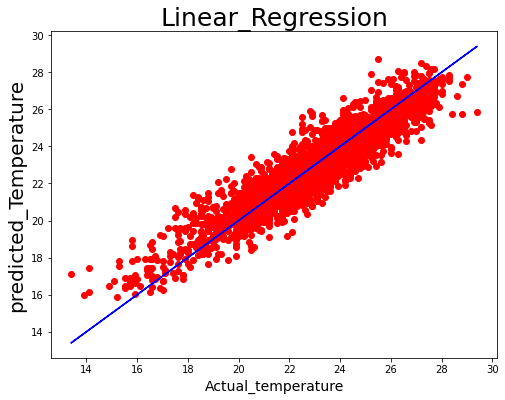

In [253]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target2_test,y=pred_test2,color='r')
plt.plot(target2_test,target2_test,color='b')
plt.xlabel("Actual_temperature",fontsize=14)
plt.ylabel("predicted_Temperature",fontsize=20)
plt.title("Linear_Regression",fontsize=25)
plt.show()

Best Fit Line covering most of the datapoint which shows good fit of our model 

### Regularization

In [254]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings 
warnings.filterwarnings('ignore')

In [255]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10], 'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters,cv=5)
clf.fit(features_train,target2_train)

print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [256]:
ls=Lasso(alpha=0.001,random_state=0)
ls.fit(features_train,target2_train)
ls.score(features_train,target2_train)

pred_ls = ls.predict(features_test)

lss=r2_score(target2_test,pred_ls)
lss

0.8508103308475099

###### lasso is giving the accuracy score of 85%

In [257]:
cv_score=cross_val_score(ls,features,target2,cv=7)
cv_mean=cv_score.mean()
cv_mean

0.7652761319310188

###### cross-val_score of lasso model is 76%

### Checking Ridge method

In [258]:
from sklearn.linear_model import Ridge
parameters={'alpha':[.0001,.001,.01,.1,1,10], 'random_state':list(range(0,10))}
rd=Ridge()
clf=GridSearchCV(rd,parameters,cv=5)
clf.fit(features_train,target2_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [259]:
rd=Ridge(alpha=10,random_state=0)
rd.fit(features_train,target2_train)
rd.score(features_train,target2_train)

pred_rd = rd.predict(features_test)

rdg=r2_score(target2_test,pred_rd)
rdg

0.8506874422893137

###### Ridge method is giving r2_Score of 83%

In [260]:
cv_score=cross_val_score(rd,features,target2,cv=7)
cv_mean=cv_score.mean()
cv_mean

0.7648567673032324

###### cross val scoreof ridge method is 76%

### Ensemble Technique¶

In [261]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt",'log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(features_train,target2_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [262]:
rf=RandomForestRegressor(criterion='mse' ,max_features='sqrt')
rf.fit(features_train,target2_train)
rf.score(features_train,target2_train)
pred_rf=rf.predict(features_test)

rfs= r2_score(target2_test,pred_rf)
print("R2_score",rfs*100)


R2_score 92.84183846804714


###### Random_Forest_Regressor is giving the r2_score of 92.01%

In [263]:
cv_score=cross_val_score(rf,features,target2,cv=7)
cv_mean=cv_score.mean()
cv_mean

0.7575120196502596

###### cross_Val_score of RandomForestRegressor is 76%


    
1)  Linear Regression  is having r2_score  85   and cross_val_score  of   77  so the Difference is    8 

2)  Lasso  is having r2_score 85  and cross_val_score  of     76  so the Difference is    9

3)  Ridge  is having r2_score 85  and cross_val_score  of     76  so the Difference is    9
 
4)  RandomForestRegressor is having r2_score 92  and cross_val_score  of  76  so the Difference is  16

###### we can observe that the difference between the r2_score and Cross_val_score is 8 in LinearRegression, and 16 in RandomForestRegressor respectively  , and  the difference in r2_score and cross_val_score in Lasso and Ridge is 9 and 9 respectively


so taking LinearRegression as our final model

### Saving the Model

In [264]:

import pickle
filename='Temperature_next_Tmin_prediction_Ls_.pkl'
pickle.dump(lr,open(filename,'wb'))

In [265]:
#cross-checking that how well our model has learnt

In [266]:
loaded_model=pickle.load(open('Temperature_next_Tmin_prediction_Ls_.pkl','rb'))
result=loaded_model.score(features_test,target2_test)

print(result)

0.8507269725530593


In [267]:
conclusion=pd.DataFrame([loaded_model.predict(features_test)[:],pred_ls[:]],index=["Predicted","Original"])

In [268]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2267,2268,2269,2270,2271,2272,2273,2274,2275,2276
Predicted,21.072686,25.270050,19.004995,25.625647,22.346907,22.338259,23.575306,25.120322,20.970803,26.670780,...,26.639126,22.616507,21.368094,23.519152,23.542541,21.756673,19.453177,22.014252,22.369175,24.115917
Original,21.076236,25.270041,19.000845,25.624109,22.349831,22.334957,23.576272,25.118410,20.968467,26.662449,...,26.654373,22.617561,21.362096,23.511668,23.534256,21.753428,19.467164,22.008564,22.363683,24.103036


##### you can observe the predicted and original values and conclude how well our model has learn